In [2]:
!pip install pandas numpy matplotlib scikit-learn xgboost joblib catboost

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib
from datetime import datetime
from sklearn.neural_network import MLPClassifier
import os
from sklearn.metrics import confusion_matrix, cohen_kappa_score, mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from catboost import CatBoostClassifier


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 58.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 28.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 69.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.9 MB/

In [3]:
df = pd.read_csv('../data/batter_prediction_dataset/batter_prediction_dataset_V4.csv', low_memory=False)
print("Finished Loading Data")
# df = df[~df['bb_type'].isin([15, 16])]
cols_to_convert = [
    'pitch_type', 'release_speed', 'release_pos_x', 'release_pos_y', 'release_pos_z', 'pfx_x', 'pfx_z', 'vx0',
    'vy0', 'vz0', 'ax', 'ay', 'az', 'effective_speed', 'release_spin_rate', 'release_extension', 'plate_x',
    'plate_z', 'p_throws', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
    'inning_topbot', 'home_score', 'away_score', 'at_bat_number', 'pitch_number',
    'zone_level', 'hc_x_level', 'hc_y_level', 'hit_distance_sc_level', 'estimated_ba_using_speedangle_level',
    'babip_value_level', 'iso_value_level', 'bat_speed_level', 'swing_length_level', 'stand', 'P_bb_type_fly_ball',
    'P_bb_type_ground_ball', 'P_bb_type_line_drive', 'P_bb_type_popup', 'P_bb_type_other',
    'P_launch_speed_angle_0', 'P_launch_speed_angle_1', 'P_launch_speed_angle_2', 'P_launch_speed_angle_3',
    'P_launch_speed_angle_4', 'P_launch_speed_angle_5', 'P_launch_speed_angle_6', 'bb_type',
    'estimated_slg_using_speedangle_level', 'P_estimated_slg_using_speedangle_level', 'if_fielding_alignment',
    'of_fielding_alignment', 'home_score_diff', 'home_win_exp', 'age_pit', 'n_thruorder_pitcher',
    'n_priorpa_thisgame_player_at_bat', 'age_bat', 'batter_days_since_prev_game', 'prev_batter_type_1',
    'prev_bat_win_exp_1', 'prev_batter_type_2', 'prev_bat_win_exp_2', 'prev_batter_type_3', 'prev_bat_win_exp_3',
    'prev_batter_type_4', 'prev_bat_win_exp_4', 'prev_batter_type_5', 'prev_bat_win_exp_5'
]

Finished Loading Data


In [4]:
for col in cols_to_convert:
    if df[col].map(type).eq(str).any():
        df[col] = df[col].str.extract('([0-9.-]+)', expand=False)
        df[col] = df[col].astype(float)
df['prev_bat_win_exp_1'] = df['prev_bat_win_exp_1'].fillna(0)
df['prev_bat_win_exp_2'] = df['prev_bat_win_exp_2'].fillna(0)
df['prev_bat_win_exp_3'] = df['prev_bat_win_exp_3'].fillna(0)
df['prev_bat_win_exp_4'] = df['prev_bat_win_exp_4'].fillna(0)
df['prev_bat_win_exp_5'] = df['prev_bat_win_exp_5'].fillna(0)

df = df.dropna()
df = df.drop(columns=['batter', 'game_pk', 'bat_win_exp'])


X = df.drop(columns=['bb_type'])
y = df['bb_type']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Finished standardizing data")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print("Finished Splitting data")

Finished standardizing data
Finished Splitting data


In [6]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    # 'activation': ['relu', 'tanh', 'logistic'],
    # 'solver': ['adam', 'sgd'],
    # 'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000],
}

pca_components_list = [30,50, None]
pca_accuracies = []
best_accuracy = 0
best_model = None
best_pca_components = 0

print("Starting PCA & GridSearchCV")

Starting PCA & GridSearchCV


In [7]:
for n_components in pca_components_list:
    print('n_components:', n_components)
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else:
        X_train_pca, X_test_pca = X_train, X_test

    mlp_model = MLPClassifier(random_state=42)
    grid_search = GridSearchCV(mlp_model, param_grid, cv=2, scoring='accuracy', n_jobs=1, verbose=3)

    grid_search.fit(X_train_pca, y_train)

    y_pred = grid_search.best_estimator_.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    pca_accuracies.append((n_components, accuracy))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_
        best_pca_components = n_components

os.makedirs('../model', exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_filename = f"../model/best_mlp_batter_agent_prediction_model_{timestamp}.joblib"

n_components: 30
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END hidden_layer_sizes=(50,), max_iter=200;, score=0.823 total time= 2.6min
[CV 2/2] END hidden_layer_sizes=(50,), max_iter=200;, score=0.823 total time= 3.0min
[CV 1/2] END hidden_layer_sizes=(50,), max_iter=500;, score=0.823 total time= 2.7min
[CV 2/2] END hidden_layer_sizes=(50,), max_iter=500;, score=0.823 total time= 3.0min
[CV 1/2] END hidden_layer_sizes=(50,), max_iter=1000;, score=0.823 total time= 2.7min
[CV 2/2] END hidden_layer_sizes=(50,), max_iter=1000;, score=0.823 total time= 3.2min
[CV 1/2] END hidden_layer_sizes=(100,), max_iter=200;, score=0.822 total time= 5.7min
[CV 2/2] END hidden_layer_sizes=(100,), max_iter=200;, score=0.822 total time= 6.4min
[CV 1/2] END hidden_layer_sizes=(100,), max_iter=500;, score=0.822 total time= 5.7min
[CV 2/2] END hidden_layer_sizes=(100,), max_iter=500;, score=0.822 total time= 6.5min
[CV 1/2] END hidden_layer_sizes=(100,), max_iter=1000;, score=0.822

In [8]:
print(best_pca_components)
pca = PCA(n_components=best_pca_components)
pca.fit_transform(X_train)
joblib.dump({
    'model': best_model,
    'pca': pca if best_pca_components is not None else None,
    'n_components': best_pca_components,
    'accuracy': best_accuracy
}, model_filename)

print(f"Model saved to {model_filename}")

None
Model saved to ../model/best_mlp_batter_agent_prediction_model_20250111_212023.joblib


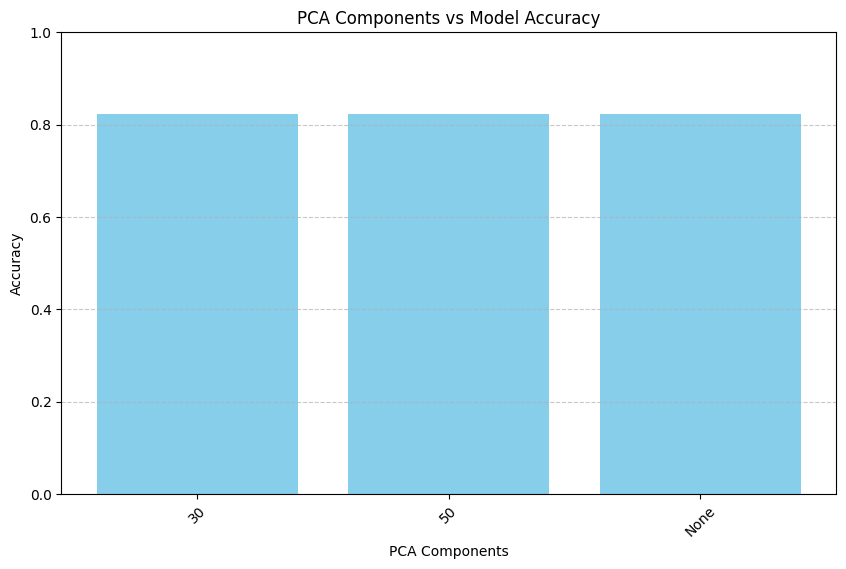

Accuracy of loaded model: 0.8235


In [9]:
components, accuracies = zip(*pca_accuracies)
components = ['None' if c is None else str(c) for c in components]

plt.figure(figsize=(10, 6))
plt.bar(components, accuracies, color='skyblue')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.title('PCA Components vs Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

model_folder = os.path.join('..', 'model')
file_path = os.path.join(model_folder, model_filename)

saved_model = joblib.load(file_path)
loaded_model = saved_model['model']
loaded_pca = saved_model['pca']

if loaded_pca is not None:
    X_test_pca = loaded_pca.transform(X_test)
else:
    X_test_pca = X_test

y_pred_loaded = loaded_model.predict(X_test_pca)
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of loaded model: {loaded_accuracy:.4f}")

In [ ]:
import numpy as np

coefs = best_model.coefs_[0]  # First layer weights
feature_importance = np.mean(np.abs(coefs), axis=1)

features = X.columns if best_pca_components is None else [f'PC{i+1}' for i in range(best_pca_components)]
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance, color='coral')
plt.xlabel('Weight Magnitude')
plt.title('Feature Importance Based on Weight Magnitude (MLP)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    # 'l2_leaf_reg': [1, 3, 5, 7],
    # 'bagging_temperature': [0, 1, 2],
    # 'border_count': [32, 64, 128],
    # 'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
}

pca_components_list = [30,50,None]
pca_accuracies = []
best_accuracy = 0
best_model = None
best_pca_components = 0

In [12]:
for n_components in pca_components_list:
    print('n_components:', n_components)
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else:
        X_train_pca, X_test_pca = X_train, X_test

    cat_model = CatBoostClassifier(eval_metric='MultiClass', random_state=42, task_type='GPU', verbose=0)
    grid_search = GridSearchCV(cat_model, param_grid, cv=2, scoring='accuracy', n_jobs=1)

    grid_search.fit(X_train_pca, y_train)

    y_pred = grid_search.best_estimator_.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    pca_accuracies.append((n_components, accuracy))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_
        best_pca_components = n_components


n_components: 50
n_components: None


None


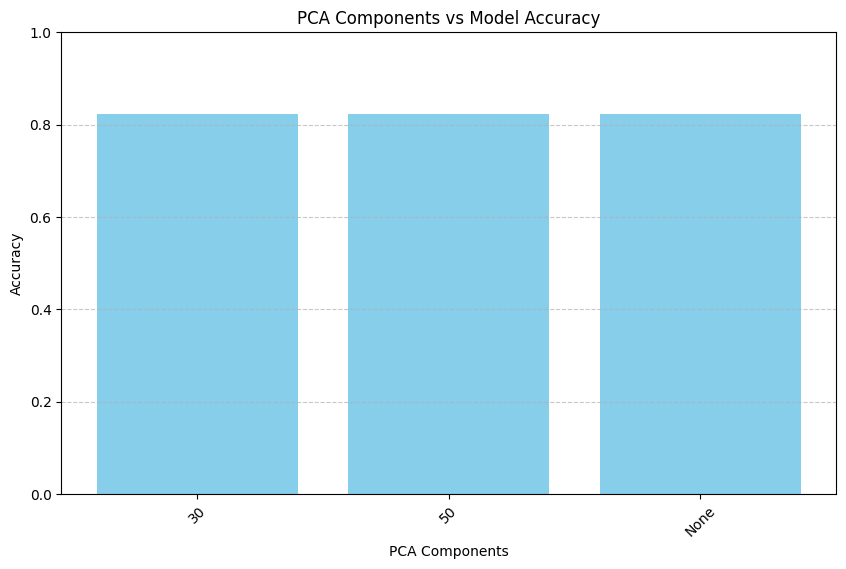

In [13]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_filename = f"../model/best_catboost_batter_agent_prediction_model_{timestamp}.joblib"
model_folder = os.path.join('..', 'model')
os.makedirs(model_folder, exist_ok=True)

model_filename = f"best_catboost_batter_agent_prediction_model_{timestamp}.joblib"
file_path = os.path.join(model_folder, model_filename)

print(best_pca_components)
pca = PCA(n_components=best_pca_components)
pca.fit_transform(X_train)
joblib.dump({
    'model': best_model,
    'pca': pca if best_pca_components is not None else None,
    'n_components': best_pca_components,
    'accuracy': best_accuracy
}, file_path)



components, accuracies = zip(*pca_accuracies)
components = ['None' if c is None else str(c) for c in components]

plt.figure(figsize=(10, 6))
plt.bar(components, accuracies, color='skyblue')
plt.xlabel('PCA Components')
plt.ylabel('Accuracy')
plt.title('PCA Components vs Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


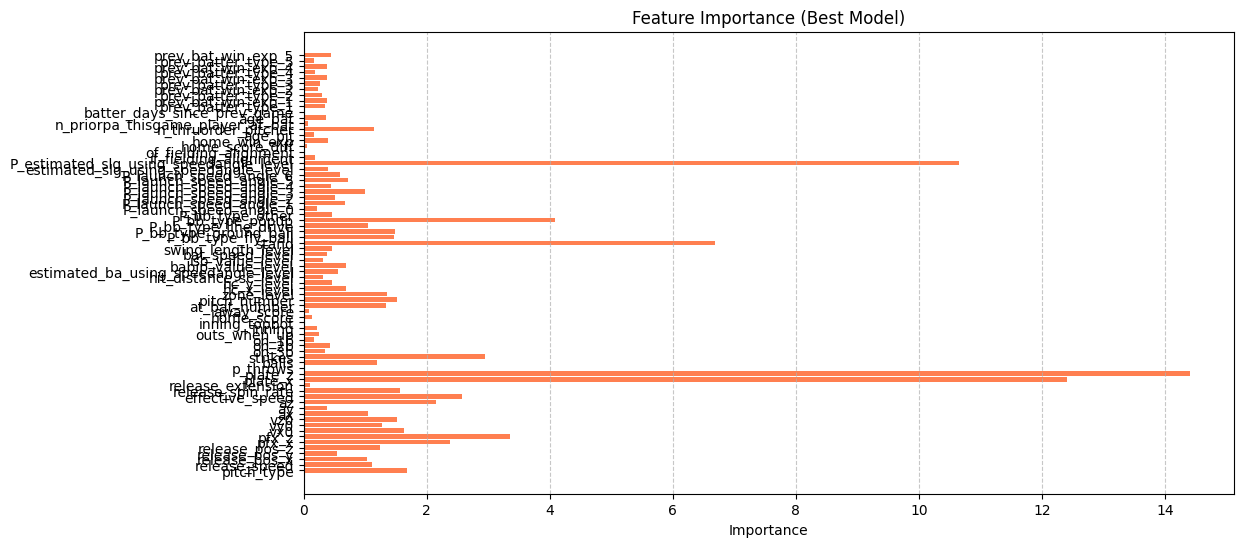

Best accuracy: 0.8237 with PCA components: None


In [14]:
feature_importances = best_model.feature_importances_

if best_pca_components is None:
    features = X.columns
else:
    features = [f'PC{i+1}' for i in range(best_pca_components)]

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='coral')
plt.xlabel('Importance')
plt.title('Feature Importance (Best Model)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


print(f"Best accuracy: {best_accuracy:.4f} with PCA components: {best_pca_components}")


In [15]:
saved_model = joblib.load(file_path)
loaded_model = saved_model['model']
loaded_pca = saved_model['pca']

if loaded_pca is not None:
    X_test_pca = loaded_pca.transform(X_test)
else:
    X_test_pca = X_test

y_pred_loaded = loaded_model.predict(X_test_pca)
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of loaded model: {loaded_accuracy:.4f}")

Accuracy of loaded model: 0.8237
